# Pymaceuticals Inc.

Analysis:
..

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import pearsonr

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
# Display the data table for preview
mouse_study.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [27]:
# Checking the number of mice.
mouse_study['Mouse ID'].nunique()

249

In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [29]:
identifiers = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]
identifiers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [30]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_dupes = mouse_study.loc[mouse_study["Mouse ID"] == "g989"]
mouse_dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_no_dupes = mouse_study.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
study_no_dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


# Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor = study_no_dupes.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
median_tumor = study_no_dupes.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
var_tumor = study_no_dupes.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
std_tumor = study_no_dupes.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
sem_tumor = study_no_dupes.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()

tumor_size_stats  = pd.DataFrame(
    {
        "Mean Tumor Volume": mean_tumor,
        "Median Tumor Volume": median_tumor,
        "Var Tumor Volume": var_tumor,
        "Std Dev Tumor Volume": std_tumor,
        "SEM Tumor Volume": sem_tumor
    })

In [33]:
# Assemble the resulting series into a single summary DataFrame.
tumor_size_stats

,Mean Tumor Volume,Median Tumor Volume,Var Tumor Volume,Std Dev Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

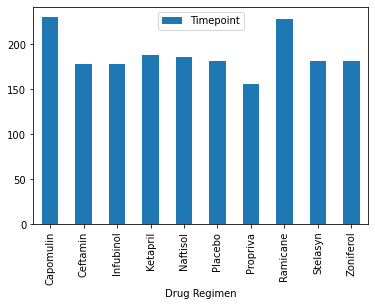

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
study_no_dupes.groupby(['Drug Regimen']).count().plot(kind='bar', y= 'Timepoint')

In [35]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
time= study_no_dupes.groupby(['Drug Regimen']).count().reset_index()
drug= time['Drug Regimen']
time2= time['Timepoint']

<BarContainer object of 10 artists>

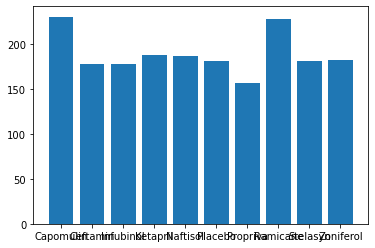

In [36]:
plt.bar(drug,time2, width=0.8, align='center', data=None)

<AxesSubplot:ylabel='Mouse ID'>

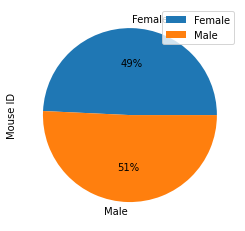

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Labels for the sections of our pie chart
study_no_dupes.groupby(['Sex']).count().plot(kind='pie', y='Mouse ID',autopct='%1.0f%%')

([<matplotlib.patches.Wedge at 0x29aa7e91c40>,
 [Text(0.02795224913982119, -1.1996744023975945, 'Male'),
  Text(-0.02562279208334739, 1.099701537930112, 'Female')],
 [Text(0.016305478664895692, -0.6998100680652635, '51%'),
  Text(-0.013976068409098574, 0.5998372025073339, '49%')])

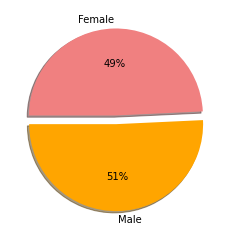

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
Male_mice = study_no_dupes[(study_no_dupes["Sex"]=="Male")].count()
Female_mice = study_no_dupes[(study_no_dupes["Sex"]=="Female")].count()
# The values of each section of the pie chart
sizes = [958, 930]
# The colors of each section of the pie chart
colors = ["orange", "lightcoral"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.0f%%', shadow=True, startangle=180)

# Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = study_no_dupes.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

In [40]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged = max_time.merge(study_no_dupes, how='left', on=['Mouse ID', 'Timepoint'])
merged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [41]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged.loc[merged["Drug Regimen"] == drug, 'Tumor Volume (mm3)']  
    # add subset
    tumor_vol_list.append(final_tumor_vol)
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Tumor Volumes')

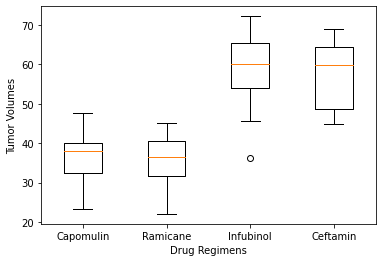

In [42]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_list, labels = treatment_list)
plt.xlabel('Drug Regimens')
plt.ylabel('Tumor Volumes')

# Line and Scatter Plots

In [43]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_mouse = study_no_dupes.loc[study_no_dupes['Mouse ID']=='l509']
capo_time = sorted(capo_mouse['Timepoint'])
capo_volume = sorted(capo_mouse['Tumor Volume (mm3)'])

Text(0.5, 1.0, 'Tumor Volume over Time in Mouse l509')

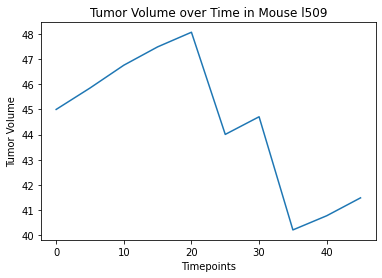

In [44]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_time = capo_mouse['Timepoint']
capo_volume = capo_mouse['Tumor Volume (mm3)']
plt.plot(capo_time,capo_volume)
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume over Time in Mouse l509')

Text(0.5, 1.0, 'Tumor Volume vs Mouse Weight')

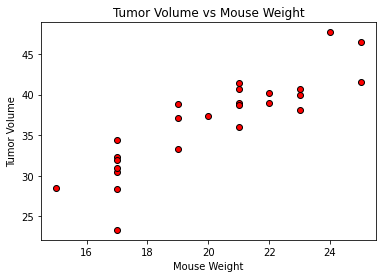

In [45]:
# Generate a scatter plot of tumor volume vs. mouse weight for the Capomulin regimen

#Create separate df with just Capomulin data
capo_data = merged.loc[merged['Drug Regimen']=='Capomulin']

mouse_tum_vol = capo_data['Tumor Volume (mm3)']
mouse_weight = capo_data['Weight (g)']
plt.scatter(mouse_weight, mouse_tum_vol, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume vs Mouse Weight')

# Correlation and Regression

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [61]:
def linear_regression(x,y,z):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.title(z)
    print(rvalue**2)
    plt.show()

In [62]:
capo_time = sorted(capo_data['Timepoint'])
capo_volume = sorted(capo_data['Tumor Volume (mm3)'])

0.7686134812139006


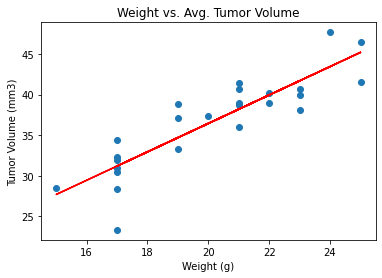

In [63]:
x_values = capo_data['Weight (g)']
y_values = capo_data['Tumor Volume (mm3)']
z= "Weight vs. Avg. Tumor Volume"

linear_regression(x_values, y_values, z)

In [ ]:
plt.scatter(capo_data.iloc[:,1],capo_data.iloc[:,8])
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume vs Mouse Weight')

In [ ]:
capo_data